HW 13: Write a program that illustrates, in some way, the Central Limit Theorem (preferably with one or more figures).

For example, the Central Limit Theorem indicates that the normalized sum (i.e. the arithmetic mean) of random variables, each independently sampled from the same distribution, will asymptotically follow a Gaussian distribution. Try sampling a continuous variable from a probability distribution that is *not* a Gaussian - repeat this N times and take the average. Then repeat *that* again many times (so M "experiments" each with N samples) - what does this distribution of averages look like? As you increase N?


In [12]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from scipy.stats import beta as scipybeta
from numpy.random import beta as npbeta
from scipy.stats import gamma

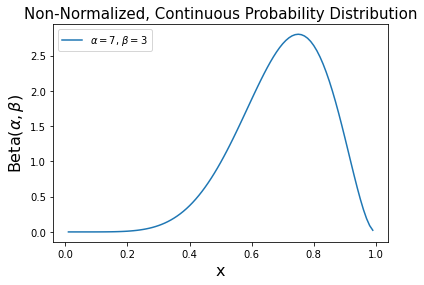

In [14]:
#the probability distribution from which to sample --> beta function with parameters a, b
a,b=7,3
    
x = np.arange (0.01, 1, 0.01)
y = scipybeta.pdf(x,a,b)
plt.figure()
plt.plot(x,y,label = r'$\alpha =$' + str(a) +', '+ r'$\beta =$' + str(b))
plt.xlabel('x',fontsize=16)
plt.ylabel(r'Beta($\alpha, \beta$)',fontsize=16)
plt.legend(fontsize=10)
plt.title('Non-Normalized, Continuous Probability Distribution',fontsize=15)
plt.show()

Text(0.5, 1.0, 'Normalized, Continuous Probability Distribution')

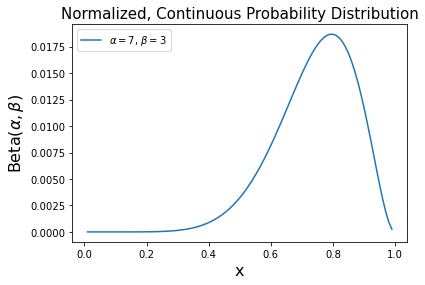

In [39]:
# normalized version, according to 
# https://math.stackexchange.com/questions/251624/problem-deriving-beta-distribution-normalizing-constant
# normalizing is sort of irrelevant for our purposes, but I would like to have a go at displaying the result.
y_gam_a = gamma.pdf(x,a)
y_gam_b = gamma.pdf(x,b)
y_gam_ab = gamma.pdf(x,a+b)
y_norm = y_gam_a*y_gam_b/y_gam_ab

plt.plot(x,y/y_norm,label = r'$\alpha =$' + str(a) +', '+ r'$\beta =$' + str(b))
plt.xlabel('x',fontsize=16)
plt.ylabel(r'Beta($\alpha, \beta$)',fontsize=16)
plt.legend(fontsize=10)
plt.title('Normalized, Continuous Probability Distribution',fontsize=15)

In [41]:
#find the location of the peaks, since there appeared to have been a slight narrowing of the normalized curve.

#normalized
print(np.where(y/y_norm == np.max(y/y_norm)))
#not normalized
print(np.where(y==np.max(y)))

(array([79]),)
(array([74]),)


In [42]:
#I am not too sure why the peak shifts by 0.5?
print(x[74])
print(x[79])

0.75
0.8


--------

In [ ]:
#anyhow.
#the following samples a float from 0 to 1 according to the previously defined beta distribution
beta_dist_sample = npbeta(a,b)

Text(0.5, 0, 'value of np.random')

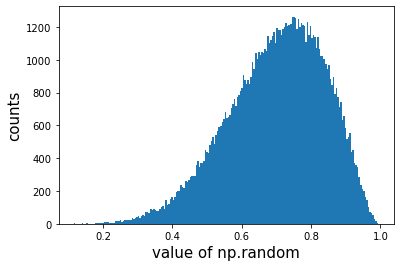

In [64]:
#to demonstrate that the beta distribution follows the correct function,
d = []
for i in range(0,100000):
    d.append(npbeta(a,b))
plt.hist(d,bins=200)
plt.ylabel('counts',fontsize=15)
plt.xlabel('value of np.random',fontsize=15)

In [82]:
#sample continuous variable from probability distribution --> repeat N times and calculate the average

N_samples = 100
M_exp = 1000
average_list = []
for i in range(0,M_exp):    
    vals=[]
    for i in range(0,N_samples):
        vals.append(npbeta(a,b))
    vals = np.asarray(vals)    
    average = np.mean(vals)
    average_list.append(average)

#this should yield 1000 averages, which matches the M_exp value

len(average_list)

1000

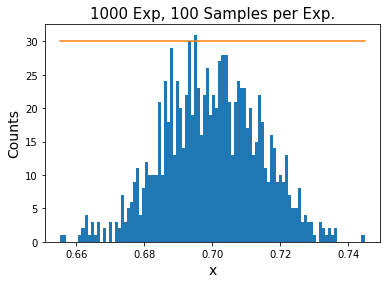

In [130]:
bins=plt.hist(average_list,bins=100)
plt.xlabel('x',fontsize=14)
plt.ylabel('Counts',fontsize=14)
plt.title(str(M_exp)+' Exp, '+str(N_samples)+' Samples per Exp.',fontsize=15)

In [84]:
from statistics import NormalDist

In [90]:
data=average_list
norm=NormalDist.from_samples(data)
norm.mean

0.6998631615066238

In [96]:
norm.stdev

0.014229325764138783